In [256]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

In [334]:
dFrame = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-042219-lectures/master/Module_4/kc_feat_engineering_project_revamp/kc_housing_data_for_feat_engineering_lab.csv' ,index_col='id')

PART 1 EXPLORE DATA SET

In [335]:
dFrame.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log
id,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166


In [336]:
dFrame.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log
count,2.160000e+04,21600.000000,21600.000000,21600.000000,2.160000e+04,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000
mean,5.373816e+05,3.368519,2.112755,2076.363102,1.509984e+04,1.494074,0.007315,0.233102,3.409491,7.654398,1785.811019,290.552083,1970.997083,84.175417,98077.958565,47.560010,-122.213881,1985.546713,12763.966296,46.002917,2014.323009,2.676991,13.046450
std,3.478161e+05,0.907209,0.764996,905.418691,4.143112e+04,0.539977,0.085215,0.763639,0.650764,1.170914,820.347147,439.822696,29.371050,401.161832,53.504611,0.138589,0.140865,684.040784,27310.813034,29.371050,0.467637,0.467637,0.523683
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2.000000,2014.000000,2.000000,11.225243
25%,3.213818e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470775,-122.328000,1490.000000,5100.000000,20.000000,2014.000000,2.000000,12.680385
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.615500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571750,-122.231000,1840.000000,7620.000000,42.000000,2014.000000,3.000000,13.017003
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.066675e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10080.000000,66.000000,2015.000000,3.000000,13.377006
max,3.850000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,117.000000,2015.000000,3.000000,15.163584


In [337]:
zip_codes = pd.read_csv('zip_codes_all.csv')
in_city_zip = zip_codes.loc[zip_codes['City'] == 'SEATTLE']
in_city_zip = in_city_zip['Zipcode'].to_frame()
dFrame['in_city'] = dFrame['zipcode'].apply(lambda x: 1 if x in list(in_city_zip['Zipcode']) else 0)

In [338]:
dFrame['living/lot_ratio']= dFrame['sqft_living']/dFrame['sqft_lot']

In [339]:
dFrame['cond_x_grade']= dFrame['condition']*dFrame['grade']

In [340]:
dFrame['baths+beds']= dFrame['bathrooms'] + dFrame['bedrooms']

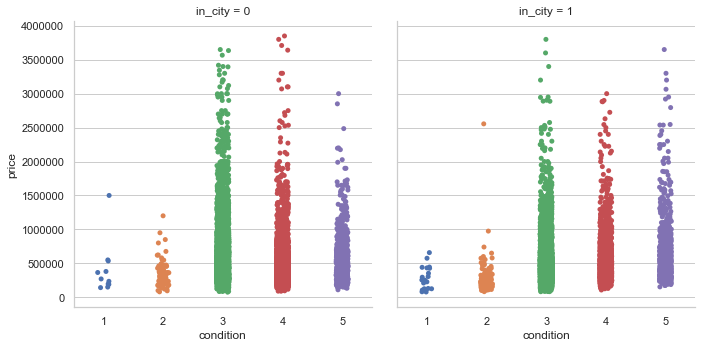

In [341]:
sns.catplot(data= dFrame, x='condition', y= 'price', col= 'in_city');

In [342]:
dFrame.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log,in_city,living/lot_ratio,cond_x_grade,baths+beds
count,2.160000e+04,21600.000000,21600.000000,21600.000000,2.160000e+04,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000
mean,5.373816e+05,3.368519,2.112755,2076.363102,1.509984e+04,1.494074,0.007315,0.233102,3.409491,7.654398,1785.811019,290.552083,1970.997083,84.175417,98077.958565,47.560010,-122.213881,1985.546713,12763.966296,46.002917,2014.323009,2.676991,13.046450,0.415463,0.323742,25.987500,5.481273
std,3.478161e+05,0.907209,0.764996,905.418691,4.143112e+04,0.539977,0.085215,0.763639,0.650764,1.170914,820.347147,439.822696,29.371050,401.161832,53.504611,0.138589,0.140865,684.040784,27310.813034,29.371050,0.467637,0.467637,0.523683,0.492813,0.268624,5.766642,1.463259
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2.000000,2014.000000,2.000000,11.225243,0.000000,0.000610,1.000000,0.000000
25%,3.213818e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470775,-122.328000,1490.000000,5100.000000,20.000000,2014.000000,2.000000,12.680385,0.000000,0.156528,21.000000,4.500000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.615500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571750,-122.231000,1840.000000,7620.000000,42.000000,2014.000000,3.000000,13.017003,0.000000,0.247528,24.000000,5.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.066675e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10080.000000,66.000000,2015.000000,3.000000,13.377006,1.000000,0.407563,28.000000,6.500000
max,3.850000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,117.000000,2015.000000,3.000000,15.163584,1.000000,4.653846,60.000000,16.500000


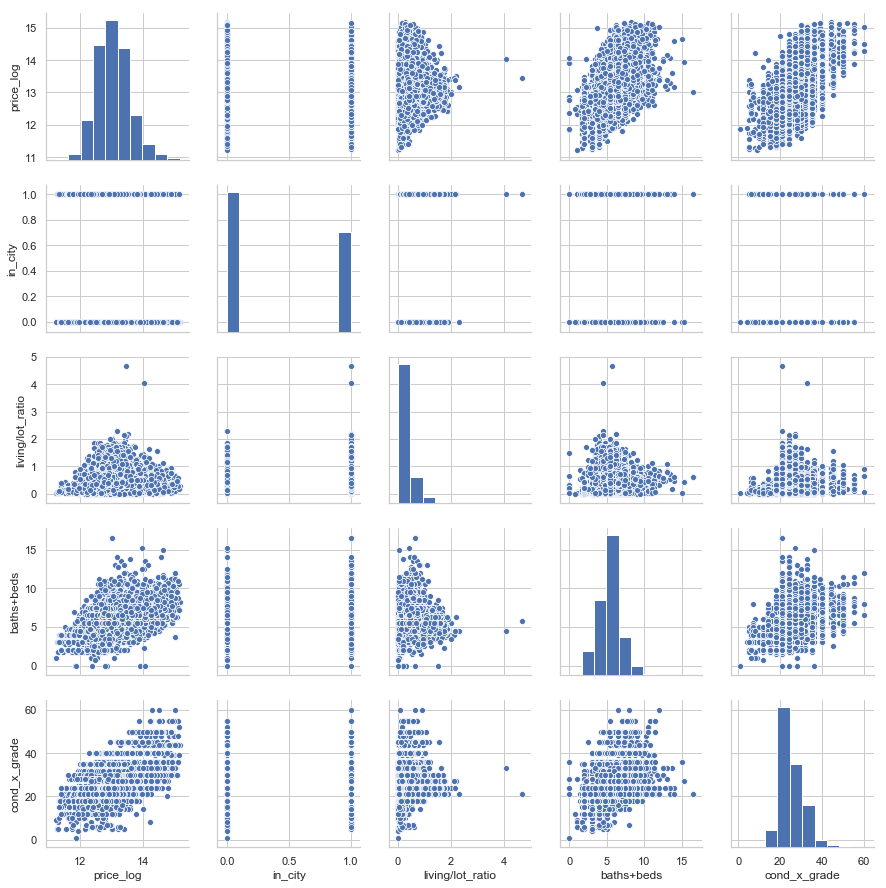

In [343]:
cols= ['price_log', 'in_city', 'living/lot_ratio', 'baths+beds', 'cond_x_grade']
sns.pairplot(dFrame, vars=cols)

***
 PART 2 MODELING

In [344]:
target = dFrame['price_log']
features = dFrame.drop(['price', 'price_log', 'date'], axis= 1)

In [345]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=999,test_size=0.2)

In [346]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17280, 25) (17280,)
(4320, 25) (4320,)


BASE MODEl (0)

In [347]:
# instantiate a model
lm= linear_model.LinearRegression()

#train a model
lm= lm.fit(X_train, y_train)

In [348]:
print(lm.intercept_)
print(lm.coef_)

123.89675341947978
[-2.60557787e-02  4.26921685e-02  9.44335174e-05  6.08080317e-07
 -3.93257857e-03  4.19083866e-01  5.89475614e-02 -1.14438200e-03
  1.15646142e-01  7.03611006e-05  2.40724169e-05 -1.39863233e-03
  4.46889362e-05 -2.16660735e-03  1.30541375e+00  8.45986329e-02
  1.25061892e-04 -1.49589752e-07  1.39863233e-03  2.51558727e-02
 -2.51558727e-02  2.53581113e-01  1.47131504e-01  1.00128117e-02
  1.66363898e-02]


In [349]:
y_train_pred= lm.predict(X_train)

In [350]:
base_mse= metrics.mean_squared_error(y_train, y_train_pred)
base_rmse= np.sqrt(base_mse)
print(f'R^2: {lm.score(X_train, y_train)}')
print(base_mse)
print(base_rmse)

R^2: 0.7804404144757484
0.06013278034216597
0.24521986123103073


In [351]:
y_test_pred= lm.predict(X_test)

In [352]:
base_test_mse= metrics.mean_squared_error(y_test, y_test_pred)
base_test_rmse= np.sqrt(base_test_mse)
print(f'R^2: {lm.score(X_test, y_test)}')
print(base_test_mse)
print(base_test_rmse)

R^2: 0.785172999823167
0.05921488896413709
0.24334109592121322


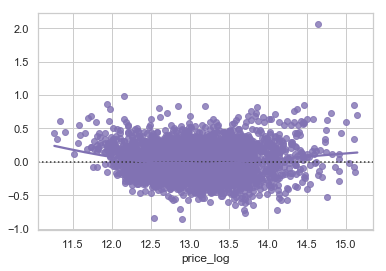

In [353]:
sns.residplot(y_test, y_test_pred, lowess= True, color= 'm');

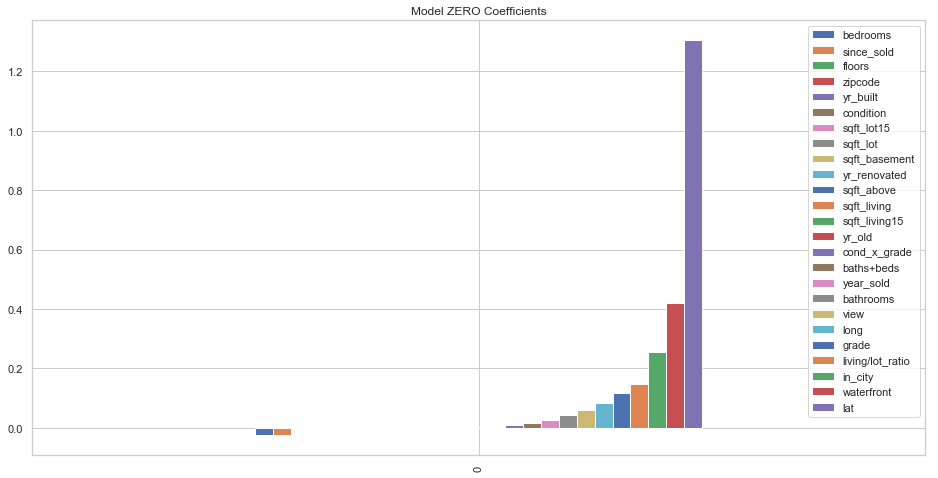

In [354]:
coef = pd.DataFrame(data=lm.coef_ ).T
coef.columns = features.columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Model ZERO Coefficients', legend=True, figsize=(16,8));

BASE MODEL SCALED (I)

In [355]:
from sklearn.preprocessing import StandardScaler

In [356]:
# instantiate a scaler object
scaler= StandardScaler()
scaler.fit(X_train)

X_train_sc  = scaler.transform(X_train)

In [357]:
# instantiate a model
lm= linear_model.LinearRegression()

#train a model
lm= lm.fit(X_train_sc, y_train)

In [358]:
y_train_sc_pred= lm.predict(X_train_sc)

In [359]:
base_sc_mse= metrics.mean_squared_error(y_train, y_train_sc_pred)
base_sc_rmse= np.sqrt(base_sc_mse)
print(f'R^2: {lm.score(X_train_sc, y_train)}')
print(base_sc_mse)
print(base_sc_rmse)

R^2: 0.7804404144757484
0.06013278034216597
0.24521986123103073


In [360]:
scaler= StandardScaler()
scaler.fit(X_test)

X_test_sc  = scaler.transform(X_test)
y_test_sc_pred= lm.predict(X_test_sc)

base_test_sc_mse= metrics.mean_squared_error(y_test, y_test_sc_pred)
base_test_sc_rmse= np.sqrt(base_test_sc_mse)
print(f'R^2: {lm.score(X_test_sc, y_test)}')
print(base_test_sc_mse)
print(base_test_sc_rmse)

R^2: 0.7849059648133603
0.05928849446271142
0.2434922883023432


***
POLYNOMIAL MODEL (II)

In [361]:
from sklearn.preprocessing import PolynomialFeatures

In [362]:
# instantiate an object
poly_2= PolynomialFeatures(degree= 2, interaction_only= False)

# fit and transform the data and create a  new dataframe
dFrame_poly_2= pd.DataFrame(poly_2.fit_transform(features), columns=poly_2.get_feature_names(features.columns))

In [363]:
dFrame_poly_2.columns

Index(['1', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade',
       ...
       'in_city^2', 'in_city living/lot_ratio', 'in_city cond_x_grade',
       'in_city baths+beds', 'living/lot_ratio^2',
       'living/lot_ratio cond_x_grade', 'living/lot_ratio baths+beds',
       'cond_x_grade^2', 'cond_x_grade baths+beds', 'baths+beds^2'],
      dtype='object', length=351)

In [364]:
X2_train, X2_test, y2_train, y2_test = train_test_split(dFrame_poly_2, target, random_state=999,test_size=0.2)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(17280, 351) (17280,)
(4320, 351) (4320,)


In [365]:
lm_p2 = linear_model.LinearRegression()
lm_p2 = lm_p2.fit(X2_train, y2_train)

y2_train_pred= lm_p2.predict(X2_train)

In [366]:
p2_mse= metrics.mean_squared_error(y2_train, y2_train_pred)
p2_rmse= np.sqrt(p2_mse)
print(f'R^2: {lm_p2.score(X2_train, y2_train)}')
print(p2_mse)
print(p2_rmse)

R^2: 0.8443208612661336
0.042637261456786396
0.20648792084958964


In [367]:
y2_test_pred= lm_p2.predict(X2_test)

In [368]:
p2_test_mse= metrics.mean_squared_error(y2_test, y2_test_pred)
p2_test_rmse= np.sqrt(p2_test_mse)
print(f'R^2: {lm_p2.score(X2_test, y2_test)}')
print(p2_test_mse)
print(p2_test_rmse)

R^2: 0.8323861547142154
0.046201060524421585
0.21494431959096194


In [369]:
# coef = pd.DataFrame(data=lm_p2.coef_ ).T
# coef.columns = dFrame_poly_2.columns

# model_coef = coef.T.sort_values(by=0).T
# model_coef.plot(kind='bar', title='Model Poly_2 Coefficients', legend=False, figsize=(16,8));

***
FEATURE SELECTION

CORRELATION

In [370]:
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,in_city,living/lot_ratio,cond_x_grade,baths+beds
bedrooms,NaN,0.528015,0.596158,0.036229,0.183653,0.011423,0.077154,0.023833,0.364982,0.493084,0.304466,0.158901,0.021581,0.156835,0.009525,0.133854,0.400224,0.029257,0.158901,0.012541,0.012541,0.188600,0.026439,0.268627,0.896033
bathrooms,NaN,NaN,0.751643,0.088941,0.501875,0.060161,0.182255,0.127951,0.661517,0.681352,0.272054,0.511946,0.047019,0.201323,0.025738,0.226419,0.564755,0.086425,0.511946,0.030534,0.030534,0.239475,0.288956,0.337503,0.850168
sqft_living,NaN,NaN,NaN,0.179820,0.358266,0.092595,0.276958,0.059968,0.763176,0.875050,0.420856,0.324806,0.048345,0.199254,0.052503,0.249389,0.758465,0.186534,0.324806,0.031779,0.031779,0.263783,0.078069,0.465933,0.762573
sqft_lot,NaN,NaN,NaN,NaN,0.002731,0.015169,0.078918,0.004999,0.121215,0.191585,0.011521,0.056470,0.006517,0.131527,0.093903,0.232948,0.149627,0.741189,0.056470,0.002892,0.002892,0.176529,0.253954,0.075890,0.068960
floors,NaN,NaN,NaN,NaN,NaN,0.023016,0.027751,0.261427,0.461384,0.525295,0.246147,0.493154,0.004979,0.055889,0.055851,0.127018,0.279932,0.008182,0.493154,0.021129,0.021129,0.047666,0.559737,0.087444,0.376246
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,0.389744,0.017433,0.075515,0.062878,0.072980,0.027309,0.093189,0.029925,0.012845,0.040881,0.085060,0.029957,0.027309,0.001670,0.001670,0.006252,0.028238,0.068809,0.024370
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047149,0.244142,0.159561,0.271717,0.055213,0.103945,0.084433,0.003298,0.074340,0.277592,0.073246,0.055213,0.000981,0.000981,0.075600,0.000666,0.214603,0.143118
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146314,0.156734,0.170154,0.366703,0.058956,0.000059,0.013470,0.107872,0.093049,0.004424,0.366703,0.047207,0.047207,0.035879,0.158789,0.733826,0.052118
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.756189,0.155568,0.453549,0.009875,0.185478,0.115629,0.207499,0.712357,0.122210,0.453549,0.032561,0.032561,0.230129,0.191338,0.552915,0.572129
sqft_above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070809,0.428811,0.016910,0.259562,0.000543,0.351918,0.731217,0.198147,0.428811,0.026513,0.026513,0.352939,0.050933,0.373155,0.661920


In [371]:
len(X_train.columns)

25

In [372]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [373]:
len(X_train.columns)

23

F TEST

In [374]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [375]:
selector = SelectKBest(f_regression, k=10)
selector.fit(X_train, y_train)

SelectKBest(k=10, score_func=<function f_regression at 0x1a27b2c8c8>)

In [376]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
print('SELECTED:', list(selected_columns))
print('---------------------')
print('REMOVED:', list(removed_columns))

SELECTED: ['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'lat', 'sqft_living15', 'cond_x_grade', 'baths+beds']
---------------------
REMOVED: ['sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15', 'year_sold', 'in_city', 'living/lot_ratio']


***
BASE MODEL WITH SELECTED FEATURES (IV)

In [377]:
X_trainS = X_train[selected_columns]
X_testS = X_test[selected_columns]

In [380]:
# instantiate a model
lm_sel= linear_model.LinearRegression()

#train a model
lm_sel= lm_sel.fit(X_trainS, y_train)

In [381]:
print(lm_sel.intercept_)
print(lm_sel.coef_)

-59.0348676984492
[-1.78499872e-02  2.47698865e-02  1.72507046e-04  9.44534990e-02
  9.64439676e-02  2.14797115e-06  1.48089363e+00  7.82450265e-05
  1.31394242e-02  6.91989926e-03]


In [382]:
y_train_pred_sel= lm_sel.predict(X_trainS)

In [383]:
base_sel_mse= metrics.mean_squared_error(y_train, y_train_pred_sel)
base_sel_rmse= np.sqrt(base_sel_mse)
print(f'R^2: {lm_sel.score(X_trainS, y_train)}')
print(base_sel_mse)
print(base_sel_rmse)

R^2: 0.7388540638420416
0.07152241237265992
0.2674367446194706


In [384]:
y_test_pred_sel= lm_sel.predict(X_testS)

In [385]:
base_test_sel_mse= metrics.mean_squared_error(y_test, y_test_pred_sel)
base_test_sel_rmse= np.sqrt(base_test_sel_mse)
print(f'R^2: {lm_sel.score(X_testS, y_test)}')
print(base_test_sel_mse)
print(base_test_sel_rmse)

R^2: 0.741090356661213
0.07136582352046426
0.26714382553310917


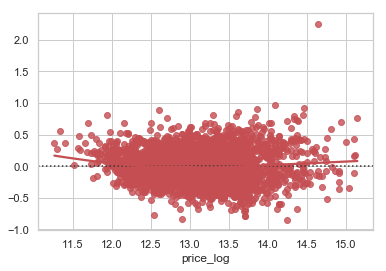

In [390]:
sns.residplot(y_test, y_test_pred_sel, lowess= True, color= 'r');

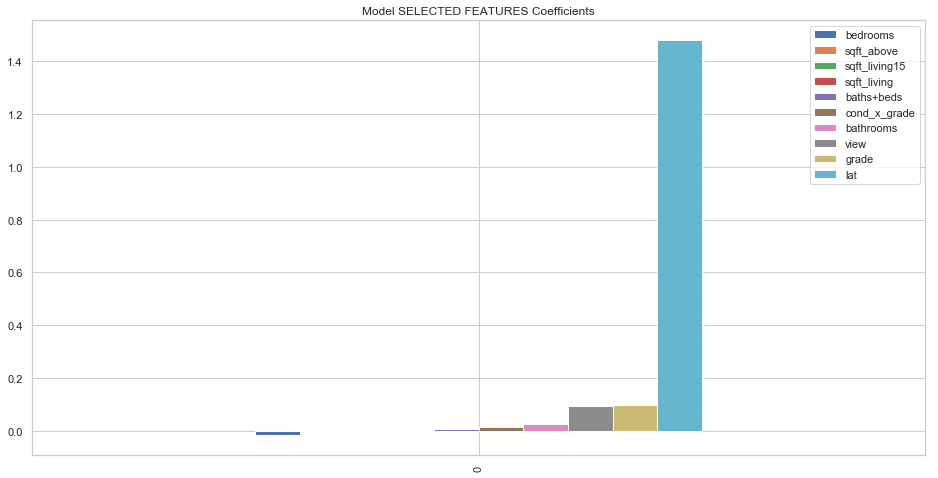

In [387]:
coef = pd.DataFrame(data=lm_sel.coef_ ).T
coef.columns = X_trainS.columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Model SELECTED FEATURES Coefficients', legend=True, figsize=(16,8));

In [311]:
#model_coef.T

***
RIDGE (V)

In [312]:
from sklearn.linear_model import Ridge

In [313]:
# instantiate a model
ridgeReg01 = Ridge(alpha=0.1, normalize=True)

# train the model
ridgeReg01.fit(X_train, y_train)

y_train_pred_R01= ridgeReg01.predict(X_train)
RMSE_train_R01= np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_R01))

y_pred_R01 = ridgeReg01.predict(X_test)
RMSE_R01 =np.sqrt(metrics.mean_squared_error(y_test, y_pred_R01))
print(f' In RIDGE test with alpha= .1 RMSE_train equals: {RMSE_train_R01}')
print(f' In RIDGE test with alpha= .1 RMSE equals: {RMSE_R01}')

 In RIDGE test with alpha= .1 RMSE_train equals: 0.26885455760352167
 In RIDGE test with alpha= .1 RMSE equals: 0.26932771138138795


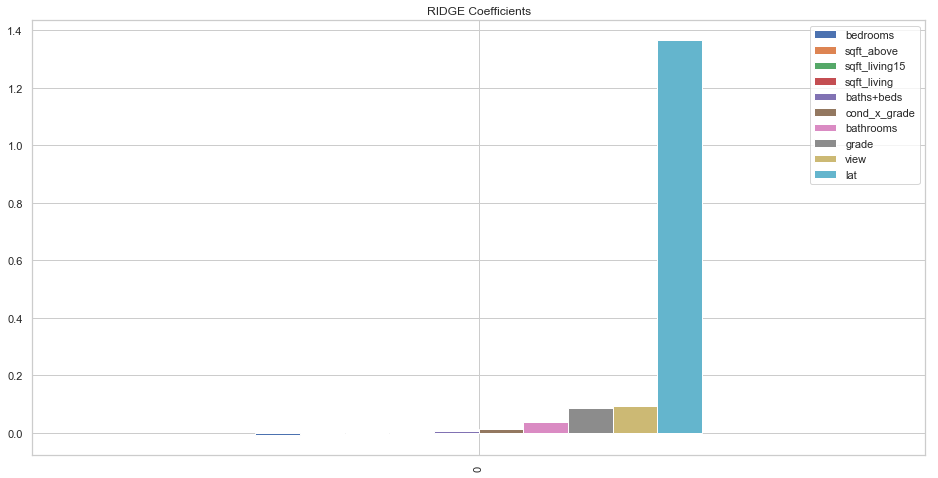

In [314]:
ridge_coef_01 = pd.DataFrame(data=ridgeReg01.coef_).T
ridge_coef_01.columns = X_test.columns
ridge_coef_01 = ridge_coef_01.T.sort_values(by=0).T
ridge_coef_01.plot(kind='bar', title='RIDGE Coefficients', legend=True, figsize=(16,8))

In [315]:
ridge_coef_01.T

,0
bedrooms,-0.008183
sqft_above,0.000036
sqft_living15,0.000087
sqft_living,0.000122
baths+beds,0.007345
cond_x_grade,0.013401
bathrooms,0.038381
grade,0.087704
view,0.092937
lat,1.365543


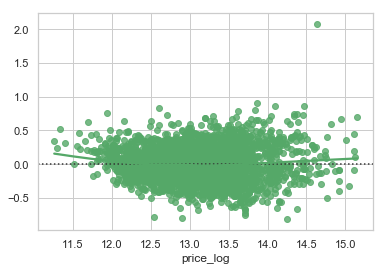

In [392]:
sns.residplot(y_test, y_pred_R01, lowess=True, color="g")

***
LASSO (VI)

In [317]:
from sklearn.linear_model import Lasso

LASSO WITH ALPHA=.001

In [318]:
#instantiate a lasso model
lassoReg001= Lasso(alpha= 0.001, normalize= True)

# train a model
lassoReg001.fit(X_train, y_train)

y_train_pred_lasso001= lassoReg001.predict(X_train)
RMSE_train_L001= np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lasso001))

y_pred_lasso001= lassoReg001.predict(X_test)
RMSE_L001= np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso001))

# display metrics
print(f' In Lasso test with alpha= .01 RMSE_train equals: {RMSE_train_L001}')
print(f' In Lasso test with alpha= .01 RMSE equals: {RMSE_L001}')

 In Lasso test with alpha= .01 RMSE_train equals: 0.3409716293411887
 In Lasso test with alpha= .01 RMSE equals: 0.34145133712236264


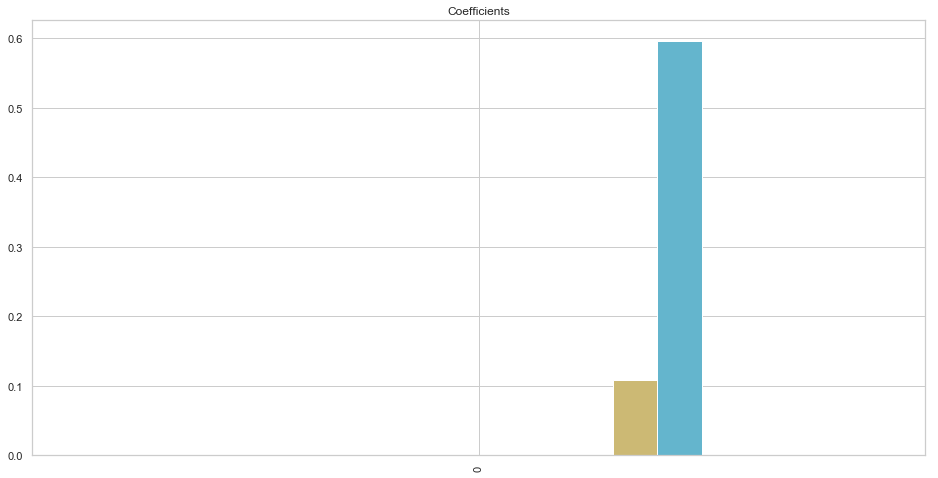

In [319]:
lasso_coef001 = pd.DataFrame(data=lassoReg001.coef_).T
lasso_coef001.columns = X_test.columns
lasso_coef001 = lasso_coef001.T.sort_values(by=0).T
lasso_coef001.plot(kind='bar', title='Coefficients', legend=False, figsize=(16,8));

In [320]:
lasso_coef001.T

,0
bedrooms,0.000000
bathrooms,0.000000
view,0.000000
sqft_above,0.000000
sqft_living15,0.000000
baths+beds,0.000000
sqft_living,0.000144
cond_x_grade,0.000160
grade,0.107777
lat,0.595930


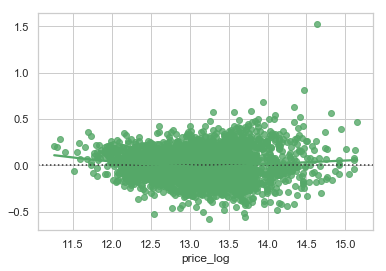

In [393]:
sns.residplot(y_test, y_pred_lasso001, lowess=True, color="g")

LASSO WITH ALPHA=.1

In [321]:
# #instantiate a lasso model
# lassoReg1= Lasso(alpha= 0.1, normalize= True)

# #train a model
# lassoReg1.fit(X_train, y_train)

# y_train_pred_lasso1= lassoReg1.predict(X_train)
# RMSE_train_L1= np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lasso1))

# y_pred_lasso1= lassoReg1.predict(X_test)
# RMSE_L1= np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))

# #display metrics
# print(f'In Lasso test with alpha= .01 RMSE_train equals: {RMSE_train_L1}')
# print(f'In Lasso test with alpha= .1 RMSE equals: {RMSE_L1}')

In [322]:
# lasso_coef1 = pd.DataFrame(data=lassoReg1.coef_).T
# lasso_coef1.columns = X_test.columns
# lasso_coef1 = lasso_coef1.T.sort_values(by=0).T
# lasso_coef1.plot(kind='bar', title='Coefficients', legend=False, figsize=(16,8))

LASSO WITH ALPHA=.5

In [323]:
# #instantiate a lasso model
# lassoReg5= Lasso(alpha= 0.5, normalize= True)

# #train a model
# lassoReg5.fit(X_train, y_train)

# y_pred_lasso5= lassoReg1.predict(X_test)
# RMSE_L5= np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso5))

# #display metrics
# print(f'In Lasso test with alpha= .5 RMSE equals: {RMSE_L5}')

In [324]:
# lasso_coef5 = pd.DataFrame(data=lassoReg5.coef_).T
# lasso_coef5.columns = X_test.columns
# lasso_coef5 = lasso_coef5.T.sort_values(by=0).T
# lasso_coef5.plot(kind='bar', title='Coefficients', legend=False, figsize=(16,8));

***
COMPARING ERRORS

In [325]:
errors= [[base_rmse, base_test_rmse], 
         [base_sc_rmse, base_test_sc_rmse], 
         [p2_rmse, p2_test_rmse], 
         [base_sel_rmse, base_test_sel_rmse],
         [RMSE_train_R01, RMSE_R01],
         [RMSE_train_L001, RMSE_L001]]

                train_error  test_error
model 0            0.245220    0.243341
model 0_scaled     0.245220    0.243492
poly 2             0.206488    0.214944
base_w_sel         0.267437    0.267144
ridge .1           0.268855    0.269328
lasso .001         0.340972    0.341451


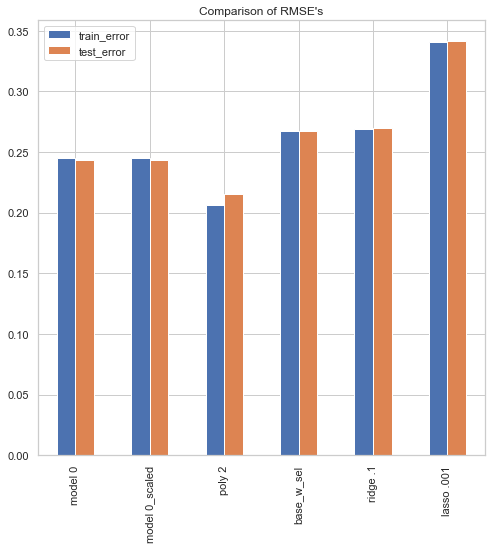

In [333]:
dFrame_error = pd.DataFrame(errors,index=['model 0', 'model 0_scaled', 'poly 2', 'base_w_sel', 'ridge .1', 'lasso .001'],  columns=['train_error', 'test_error'])
print(dFrame_error)
dFrame_error.plot.bar(title= 'Comparison of RMSE\'s', figsize=(8,8));